Importações

In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

C:\Users\lauradomingues-ieg\AppData\Local\Temp\ipykernel_1200\4157406026.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Lendo as Informações 📒

In [3]:
df_loja = pd.read_excel('loja 1.xlsx')
display(df_loja.head())

#codigo qualquer abaixo para ver se dá conflito
display(df_loja.tail())


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [42]:
#dropando colunas

df_loja_base = df_loja.drop(columns="Row ID")

df_loja_base.drop(columns="Product ID")
df_loja_base.drop(columns="Postal Code")
df_loja_base.drop(columns="Order Date")
df_loja_base.drop(columns="Ship Date")


display(df_loja_base.groupby("Order ID").describe())

Order Date                                            \
                    count                 mean                  min   
Order ID                                                              
CA-2014-100006          1  2014-09-07 00:00:00  2014-09-07 00:00:00   
CA-2014-100090          2  2014-07-08 00:00:00  2014-07-08 00:00:00   
CA-2014-100293          1  2014-03-14 00:00:00  2014-03-14 00:00:00   
CA-2014-100328          1  2014-01-28 00:00:00  2014-01-28 00:00:00   
CA-2014-100363          2  2014-04-08 00:00:00  2014-04-08 00:00:00   
...                   ...                  ...                  ...   
US-2017-168802          1  2017-11-03 00:00:00  2017-11-03 00:00:00   
US-2017-169320          2  2017-07-23 00:00:00  2017-07-23 00:00:00   
US-2017-169488          2  2017-09-07 00:00:00  2017-09-07 00:00:00   
US-2017-169502          2  2017-08-28 00:00:00  2017-08-28 00:00:00   
US-2017-169551          6  2017-07-07 00:00:00  2017-07-07 00:00:00   

                                                                               \
                                25%                  50%                  75%   
Order ID                                                                        
CA-2014-100006  2014-09-07 00:00:00  2014-09-07 00:00:00  2014-09-07 00:00:00   
CA-2014-100090  2014-07-08 00:00:00  2014-07-08 00:00:00  2014-07-08 00:00:00   
CA-2014-100293  2014-03-14 00:00:00  2014-03-14 00:00:00  2014-03-14 00:00:00   
CA-2014-100328  2014-01-28 00:00:00  2014-01-28 00:00:00  2014-01-28 00:00:00   
CA-2014-100363  2014-04-08 00:00:00  2014-04-08 00:00:00  2014-04-08 00:00:00   
...                             ...                  ...                  ...   
US-2017-168802  2017-11-03 00:00:00  2017-11-03 00:00:00  2017-11-03 00:00:00   
US-2017-169320  2017-07-23 00:00:00  2017-07-23 00:00:00  2017-07-23 00:00:00   
US-2017-169488  2017-09-07 00:00:00  2017-09-07 00:00:00  2017-09-07 00:00:00   
US-2017-169502  2017-08-28 00:00:00  2017-08-28 00:00:00  2017-08-28 00:00:00   
US-2017-169551  2017-07-07 00:00:00  2017-07-07 00:00:00  2017-07-07 00:00:00   

                                         Ship Date                       ...  \
                                max  std     count                 mean  ...   
Order ID                                                                 ...   
CA-2014-100006  2014-09-07 00:00:00  NaN         1  2014-09-13 00:00:00  ...   
CA-2014-100090  2014-07-08 00:00:00  NaN         2  2014-07-12 00:00:00  ...   
CA-2014-100293  2014-03-14 00:00:00  NaN         1  2014-03-18 00:00:00  ...   
CA-2014-100328  2014-01-28 00:00:00  NaN         1  2014-02-03 00:00:00  ...   
CA-2014-100363  2014-04-08 00:00:00  NaN         2  2014-04-15 00:00:00  ...   
...                             ...  ...       ...                  ...  ...   
US-2017-168802  2017-11-03 00:00:00  NaN         1  2017-11-07 00:00:00  ...   
US-2017-169320  2017-07-23 00:00:00  NaN         2  2017-07-25 00:00:00  ...   
US-2017-169488  2017-09-07 00:00:00  NaN         2  2017-09-09 00:00:00  ...   
US-2017-169502  2017-08-28 00:00:00  NaN         2  2017-09-01 00:00:00  ...   
US-2017-169551  2017-07-07 00:00:00  NaN         6  2017-07-09 00:00:00  ...   

               Discount           Profit                                    \
                    max       std  count        mean       min         25%   
Order ID                                                                     
CA-2014-100006      0.0       NaN    1.0  109.611300  109.6113  109.611300   
CA-2014-100090      0.2  0.000000    2.0   -9.544500  -87.9354  -48.739950   
CA-2014-100293      0.2       NaN    1.0   31.869600   31.8696   31.869600   
CA-2014-100328      0.2       NaN    1.0    1.325700    1.3257    1.325700   
CA-2014-100363      0.2  0.000000    2.0    3.859600    0.8288    2.344200   
...                 ...       ...    ...         ...       ...         ...   
US-2017-168802      0.2       NaN    1.0    5.969600    5.9696

## Boxplot 📦📦


In [16]:
#Criando os bloxplots

medidas_dataframe_segment = df_loja_base.groupby("Segment").describe().round(2)
medidas_dataframe_category = df_loja_base.groupby("Category").describe().round(2)
medidas_dataframe_subcategory = df_loja_base.groupby("Sub-Category").describe().round(2)
medidas_dataframe_product = df_loja_base.groupby("Product Name").describe().round(2)

display(medidas_dataframe_product)


Row ID                   \
                                                    count     mean     min   
Product Name                                                                 
"While you Were Out" Message Book, One Form per...    3.0  4271.33  1709.0   
#10 Gummed Flap White Envelopes, 100/Box              4.0  3628.00   356.0   
#10 Self-Seal White Envelopes                         4.0  3763.25  3043.0   
#10 White Business Envelopes,4 1/8 x 9 1/2            7.0  5938.29  2500.0   
#10- 4 1/8" x 9 1/2" Recycled Envelopes              10.0  4267.30   986.0   
...                                                   ...      ...     ...   
iKross Bluetooth Portable Keyboard + Cell Phone...    5.0  5557.40  1503.0   
iOttie HLCRIO102 Car Mount                            5.0  7432.40  5308.0   
iOttie XL Car Mount                                   2.0  7574.00  6236.0   
invisibleSHIELD by ZAGG Smudge-Free Screen Prot...    7.0  5097.86  1111.0   
netTALK DUO VoIP Telephone Service                    7.0  2051.43    69.0   

                                                                             \
                                                       25%     50%      75%   
Product Name                                                                  
"While you Were Out" Message Book, One Form per...  2746.0  3783.0  5552.50   
#10 Gummed Flap White Envelopes, 100/Box            2028.5  3164.0  4763.50   
#10 Self-Seal White Envelopes                       3515.5  3684.5  3932.25   
#10 White Business Envelopes,4 1/8 x 9 1/2          3804.0  4933.0  8280.00   
#10- 4 1/8" x 9 1/2" Recycled Envelopes             2572.5  4686.0  5571.00   
...                                                    ...     ...      ...   
iKross Bluetooth Portable Keyboard + Cell Phone...  2620.0  6219.0  8349.00   
iOttie HLCRIO102 Car Mount                          6933.0  7492.0  7969.00   
iOttie XL Car Mount                                 6905.0  7574.0  8243.00   
invisibleSHIELD by ZAGG Smudge-Free Screen Prot...  2380.5  6028.0  7863.00   
netTALK DUO VoIP Telephone Service                  1643.0  1697.0  2977.50   

                                                                     \
                                                       max      std   
Product Name                                                          
"While you Were Out" Message Book, One Form per...  7322.0  2838.19   
#10 Gummed Flap White Envelopes, 100/Box            7828.0  3132.88   
#10 Self-Seal White Envelopes                       4641.0   658.75   
#10 White Business Envelopes,4 1/8 x 9 1/2          9967.0  2899.05   
#10- 4 1/8" x 9 1/2" Recycled Envelopes             7721.0  2122.23   
...                                                    ...      ...   
iKross Bluetooth Portable Keyboard + Cell Phone...  9096.0  3384.48   
iOttie HLCRIO102 Car Mount                          9460.0  1513.70   
iOttie XL Car Mount                                 8912.0  1892.22   
invisibleSHIELD by ZAGG Smudge-Free Screen Prot...  8059.0  3071.40   
netTALK DUO VoIP Telephone Service                  3353.0  1148.08   

                                                   Order Date  \
                                                        count   
Product Name                                                    
"While you Were Out" Message Book, One Form per...          3   
#10 Gummed Flap White Envelopes, 100/Box                    4   
#10 Self-Seal White Envelopes                               4   
#10 White Business Envelopes,4 1/8 x 9 1/2                  7   
#10- 4 1/8" x 9 1/2" Recycled Envelopes                    10   
...                                                       ...   
iKross Bluetooth Portable Keyboard + Cell Phone...          5   
iOttie HLCRIO102 Car Mount                                  5   
iOttie XL Car Mount                                         2   
invisibleSHIELD by ZAGG Smudge-Free Screen Prot...          7   
netTALK DUO

<Axes: xlabel='Sales'>

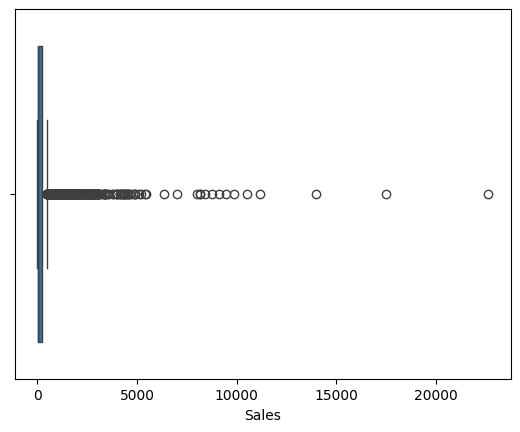

In [27]:
# sns.boxplot(data=df_loja_base, x="Quantity")
sns.boxplot(data=df_loja_base, x="Sales")